In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [ ]:
'''%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, 
the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
directly below the code cell that produced it.
The resulting plots will then also be stored in the notebook document.'''

In [5]:
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
# collecting values
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [8]:
# mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# total number of values
n=len(x)

m=0;c=0
# using the formula to calculate m and c
numer=0
denom=0

for i in range(n):
    numer+=(x[i]-mean_x)*(y[i]-mean_y)
    denom+=(x[i]-mean_x)**2
    
m=numer/denom
c=mean_y-(m*mean_x)

print(m,c)

0.26342933948939945 325.57342104944223


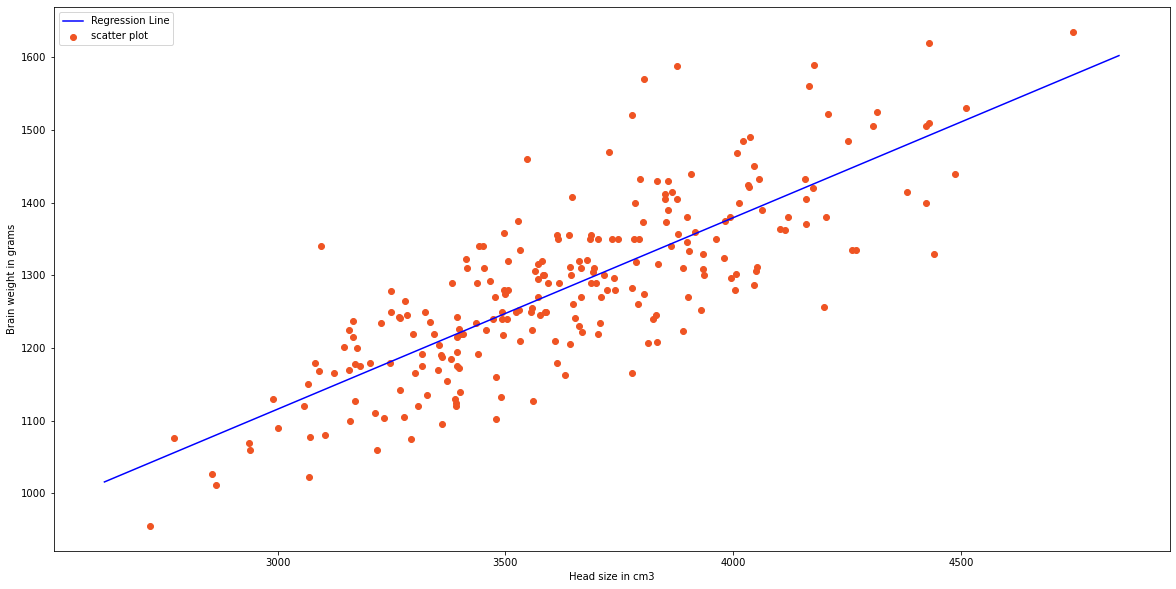

In [11]:
# Plotting Values and regression line

max_x=np.max(x)+100
min_x=np.min(x)-100

# calculating line values x an y
X = np.linspace(min_x, max_x, 1000)
Y = c+m*X

# plotting the line
plt.plot(X,Y, color='blue', label='Regression Line')
# plotting scatter points
plt.scatter(x,y, c='#ef5423', label='scatter plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [13]:
# finding R square value
ss_t=0  # total sum of square
ss_r=0 #total sum of sqaure of residuals

for i in range(n):
    y_pred=c+m*x[i]
    ss_t=(y[i]-mean_y)**2
    ss_r=(y[i]-y_pred)**2
    
r2=1-(ss_r/ss_t)
print(r2)

0.6315648136958643


In [14]:
## Linear Regression using Scikit learn

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use rank 1 matri in scikit learn
x = x.reshape((n,1))
# Creating model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(x,y)
# Y prediction
y_pred = reg.predict(x)

# Calculating R2 score
r2_score=reg.score(x,y)

print(r2_score)

0.639311719957
